In [1]:
import numpy as np
import pandas as pd

In [9]:
dataset = pd.read_csv('insurance_pre.csv')

In [10]:
dataset.head()

,age,sex,bmi,children,smoker,charges
0,19,female,27.900,0,yes,16884.92400
1,18,male,33.770,1,no,1725.55230
2,28,male,33.000,3,no,4449.46200
3,33,male,22.705,0,no,21984.47061
4,32,male,28.880,0,no,3866.85520


In [11]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(2)
memory usage: 62.8+ KB


In [12]:
dataset = pd.get_dummies(dataset, drop_first=True)

In [14]:
dataset.head()

,age,bmi,children,charges,sex_male,smoker_yes
0,19,27.900,0,16884.92400,False,True
1,18,33.770,1,1725.55230,True,False
2,28,33.000,3,4449.46200,True,False
3,33,22.705,0,21984.47061,True,False
4,32,28.880,0,3866.85520,True,False


In [15]:
dataset.columns

Index(['age', 'bmi', 'children', 'charges', 'sex_male', 'smoker_yes'], dtype='object')

In [16]:
independent = dataset[['age', 'bmi', 'children','sex_male', 'smoker_yes']]
dependent = dataset['charges']

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(independent, dependent, test_size=0.2, random_state=0)

In [31]:
X_train.head()

,age,bmi,children,sex_male,smoker_yes
621,37,34.100,4,True,True
194,18,34.430,0,True,False
240,23,36.670,2,False,True
1168,32,35.200,2,True,False
1192,58,32.395,1,False,False


In [32]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)


In [33]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
r2_score =  r2_score(y_test, y_pred)

In [35]:
r2_score

0.7978644236809905

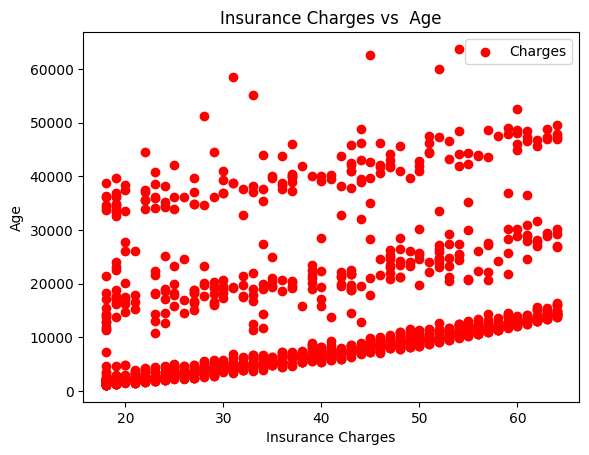

In [42]:
# Visualize the dataset
import matplotlib.pyplot as plt

plt.scatter(dataset[["age"]], dataset[["charges"]], color='red', label='Charges')
plt.title("Insurance Charges vs  Age")
plt.xlabel("Insurance Charges")
plt.ylabel("Age")
plt.legend()
plt.show()